In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Import
path_merge = r'/Users/janekobtseva/10-10-2025 Brazilian E-Commerce Public Dataset/02 Data/Prepared Data/merge.pkl'

In [4]:
df= pd.read_pickle(os.path.join(path_merge))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113232 entries, 0 to 113231
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113232 non-null  object 
 1   order_item_id                  113232 non-null  int64  
 2   product_id                     113232 non-null  object 
 3   seller_id                      113232 non-null  object 
 4   shipping_limit_date            113232 non-null  object 
 5   price                          113232 non-null  float64
 6   freight_value                  113232 non-null  float64
 7   customer_id                    113232 non-null  object 
 8   order_status                   113232 non-null  object 
 9   order_purchase_timestamp       113232 non-null  object 
 10  order_approved_at              113218 non-null  object 
 11  order_delivered_carrier_date   113231 non-null  object 
 12  order_delivered_customer_date 

In [11]:
sub = df[[
'price',
'freight_value',
'review_score',
'payment_sequential',
'payment_installments',
'payment_value',
'customer_zip_code_prefix',
'product_weight_g',
]]

In [13]:
sub.head()

,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_weight_g
0,58.90,13.29,5,1,2,72.19,28013,650.0
1,239.90,19.93,4,1,3,259.83,15775,30000.0
2,199.00,17.87,5,1,5,216.87,35661,3050.0
3,12.99,12.79,4,1,2,25.78,12952,200.0
4,199.90,18.14,5,1,3,218.04,13226,3750.0


In [15]:
sub.describe()

,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_weight_g
count,113232.000000,113232.000000,113232.000000,113232.000000,113232.00000,113232.000000,113232.000000,113231.000000
mean,119.885774,20.002270,4.082406,1.090796,2.94332,171.590517,35085.197771,2106.459556
std,181.198413,15.710028,1.345953,0.686563,2.77911,264.256090,29867.401230,3765.251651
min,0.850000,0.000000,1.000000,1.000000,0.00000,0.000000,1003.000000,0.000000
25%,39.900000,13.080000,4.000000,1.000000,1.00000,60.850000,11310.000000,300.000000
50%,74.900000,16.320000,5.000000,1.000000,2.00000,107.985000,24315.000000,700.000000
75%,133.000000,21.190000,5.000000,1.000000,4.00000,189.160000,58857.750000,1800.000000
max,6735.000000,409.680000,5.000000,26.000000,24.00000,13664.080000,99980.000000,40425.000000


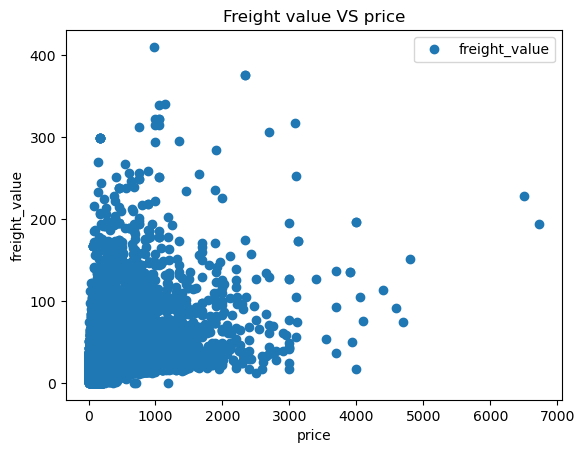

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='freight_value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Freight value VS price')  
plt.xlabel('price')  
plt.ylabel('freight_value')  
plt.show()


#I understand, that it might be to onvious, but I have tried all variables nine of them make any logic to analyze wuth a help of scater plot 

In [ ]:
#State your hypothesis in a markdown cell within your Jupyter notebook.
#There is a positive relationship between product price and freight value 

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price'].values.reshape(-1,1)
y = df['freight_value'].values.reshape(-1,1)

In [39]:
X

array([[ 58.9 ],
       [239.9 ],
       [199.  ],
       ...,
       [ 99.9 ],
       [ 55.99],
       [ 43.  ]])

In [41]:
y

array([[13.29],
       [19.93],
       [17.87],
       ...,
       [16.95],
       [ 8.72],
       [12.79]])

In [43]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
y_predicted = regression.predict(X_test)


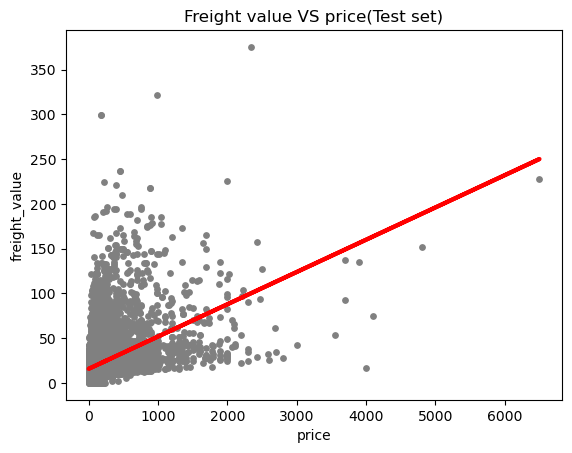

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Freight value VS price(Test set)')
plot_test.xlabel('price')
plot_test.ylabel('freight_value')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


#Slope- there is a positive relationship between y and x.
#as x rises, y rises at a degree 0,0360
#MSE-how close a regression line is to a set of points (accuracy)
#we have quite large -regression may not be the best model to 
#represent this data and can’t accurately predict
#R2 score
#how well the model explains the variance in the data
#0,1721 is closer to 0, giving a poor fit

#Hence-model isn’t performing too well.

Slope: [[0.0360715]]
Mean squared error:  205.6414089876717
R2 score:  0.1721575476924675


In [61]:
y_predicted

array([[24.83132906],
       [21.98168032],
       [17.6855643 ],
       ...,
       [21.04382124],
       [17.10842025],
       [22.51914571]])

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

#there’s quite the difference between the actual and predicted y values. 
#model isn’t doing a great job of explaining the relationship

,Actual,Predicted
0,20.69,24.831329
1,16.44,21.981680
2,11.89,17.685564
3,18.23,17.039524
4,14.10,16.819848
5,33.00,23.965252
6,45.12,21.043821
7,18.85,23.929541
8,7.43,18.554888
9,21.15,16.819848


In [67]:
##### Compare how the regression fits the training set

In [69]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [73]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0360715]]
Mean squared error:  205.6414089876717
R2 score:  0.1721575476924675


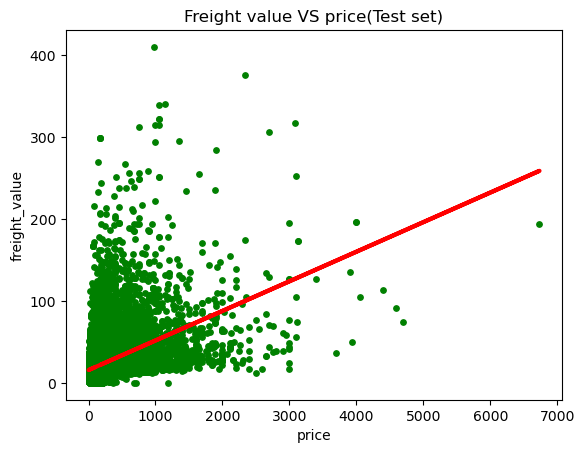

In [75]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Freight value VS price(Test set)')
plot_test.xlabel('price')
plot_test.ylabel('freight_value')
plot_test.show()


In [ ]:
#well, it fits exactly the same. mening not well 

#Price and freight value has nothing to do with each other 